In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns

# New Section

In [2]:
df = pd.read_csv('student-mat.csv')

## Feature Descriptions:

 - **school:** student's school (binary: 'GP' - Gabriel Pereira 'MS' - Mousinho da Silveira)
- **sex:** student's sex (binary: 'F' - female or 'M' - male)
- **age:** student's age (numeric: from 15 to 22)
- **address:** student's home address type (binary: 'U' - urban or 'R' - rural)
- **famsize:** family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
- **Pstatus:** parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
- **Medu:** mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
- **Fedu:** father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
- **Mjob:** - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
- **Fjob:** father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
- **reason:** reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
- **guardian:** student's guardian (nominal: 'mother', 'father' or 'other')
- **traveltime:** home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
- **studytime:** weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
- **failures:** number of past class failures (numeric: n if 1<=n<3, else 4)
- **schoolsup:** extra educational support (binary: yes or no)
- **famsup:** family educational support (binary: yes or no)
- **paid:** extra paid classes within the course subject (binary: yes or no)
- **activities:** extra-curricular activities (binary: yes or no)
- **nursery:** attended nursery school (binary: yes or no)
- **higher:** wants to take higher education (binary: yes or no)
- **internet:** Internet access at home (binary: yes or no)
- **romantic:** with a romantic relationship (binary: yes or no)
- **famrel:** quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
- **freetime:** free time after school (numeric: from 1 - very low to 5 - very high)
- **goout:** going out with friends (numeric: from 1 - very low to 5 - very high)
- **Dalc:** workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
- **Walc:** weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
- **health:** current health status (numeric: from 1 - very bad to 5 - very good)
- **absences:** number of school absences (numeric: from 0 to 93)
These grades are related with the course Math:
- **G1:** first period grade (numeric: from 0 to 20)
- **G2:** second period grade (numeric: from 0 to 20)
- **G3:** final grade (numeric: from 0 to 20)

##  Questions


 *  What are the common features that may Effect on student performance.
 * Can we predict the performance of students based on these features?




In [3]:
# Display the first few rows of the dataframe
print("First rows of the dataset:")
print(df.head())

# Summary statistics of the dataframe
print(" \nDescriptive statistics:")
print(df.describe())

# Information about the dataframe (e.g., data types, non-null values)
print(" \nExtra info about the dataset:")
print(df.info())

First rows of the dataset:
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]
 
Descriptive statistics:
              age        Medu      

#Missing and duplicates values:
We can see from the extra info shown before that there is no missing value, nevertheless we run a check as we would do for any other dataset

In [4]:
# Check for missing values
print("Missing values:")
print(df.isnull().sum())

#Check for duplicates
print(" \nDuplicates:")
duplicates = df.duplicated()
print(df[duplicates])

Missing values:
school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64
 
Duplicates:
Empty DataFrame
Columns: [school, sex, age, address, famsize, Pstatus, Medu, Fedu, Mjob, Fjob, reason, guardian, traveltime, studytime, failures, schoolsup, famsup, paid, activities, nursery, higher, internet, romantic, famrel, freetime, goout, Dalc, Walc, health, absences, G1, G2, G3]
Index: []

[0 rows x 33 columns]


In [5]:
df["G_ave"] = (df["G1"] + df["G2"] + df["G3"]) / 3


#Data exploration:
Student performance By age and sex

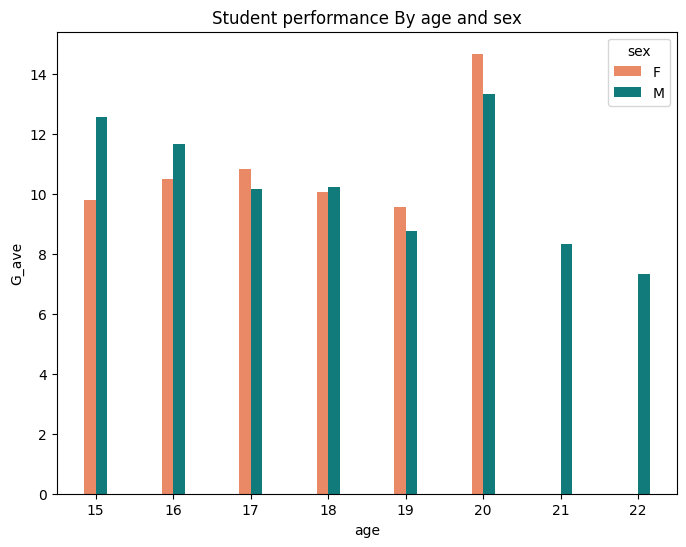

In [59]:
#Data by age and gender
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='age', y='G_ave', hue='sex',palette={'F': 'Coral', 'M': 'DarkCyan'}, estimator='mean',errorbar=None,width=0.3)
plt.title('Student performance By age and sex')
plt.show()



### Impact of Parental Education Level on Student performance
- Medu: mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
- Fedu: father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)

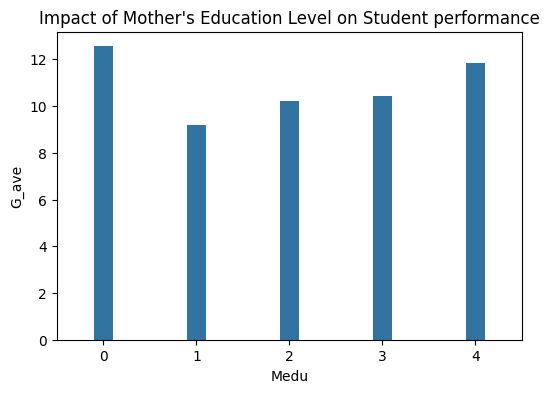

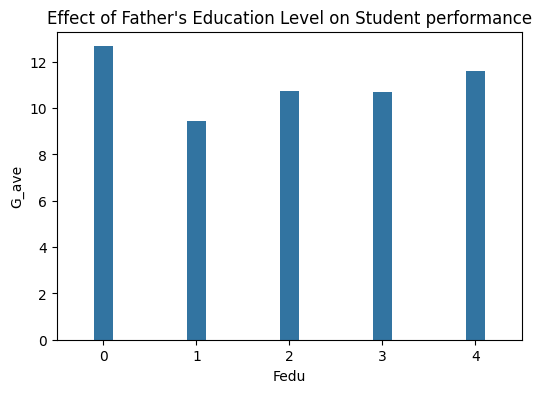

In [52]:
# Plot the Effect of parental education level on Student performance
plt.figure(figsize=(6, 4))
sns.barplot(data=df, x='Medu', y='G_ave',errorbar=None,width=0.2)
plt.title('Impact of Mother\'s Education Level on Student performance')
plt.show()

plt.figure(figsize=(6, 4))
sns.barplot(data=df, x='Fedu', y='G_ave',errorbar=None,width=0.2)
plt.title('Effect of Father\'s Education Level on Student performance')
plt.show()

there is a clear sign of non education parental on students performance.

---------------------------------------------------------------------
**2.  Parental Marital Status and Student performence**

Pstatus: parent's cohabitation status (binary: 'T' - living together or 'A' - apart)


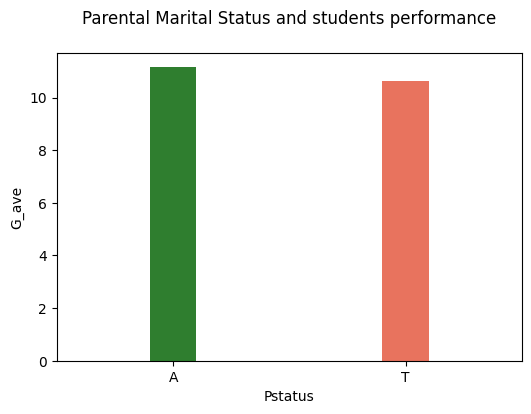

In [51]:
# Plot the Effect of parental marital status and students performancen
plt.figure(figsize=(6, 4))
sns.barplot(data=df, x='Pstatus', y='G_ave', hue='Pstatus',palette={'A': 'forestgreen', 'T': 'tomato'},errorbar=None, width=0.2, dodge=False, legend=False)
plt.title('Parental Marital Status and students performance\n')
plt.show()

:The family being appart or together does not show big defrences on the students performance

---------------------------------------------------------------------
###  impact the type of parental job on Student performance

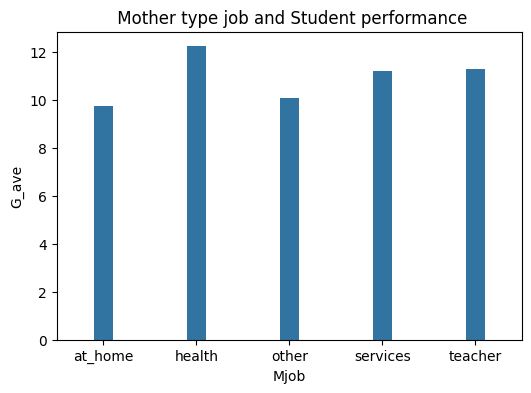

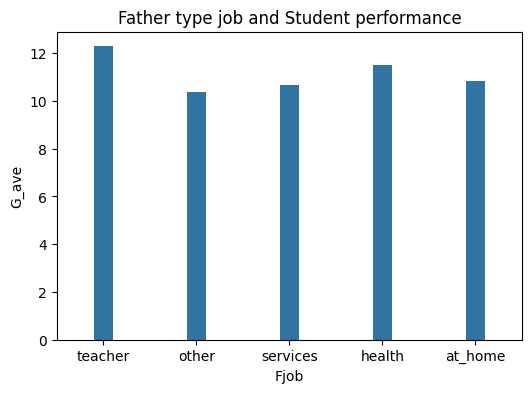

In [49]:

# Plot the Effect of type parental job on Student performance
plt.figure(figsize=(6, 4))
sns.barplot(data=df, x='Mjob', y='G_ave',errorbar=None,width=0.2)
plt.title(' Mother type job and Student performance')
plt.show()

plt.figure(figsize=(6, 4))
sns.barplot(data=df, x='Fjob', y='G_ave',errorbar=None,width=0.2)
plt.title('Father type job and Student performance')
plt.show()

* job in sectors like Health and Teaching have the highest results

----------------------------------------------------
**6. Effect the wants of continue Higher Education on Students Performence**

higher: wants to take higher education (binary: yes or no)

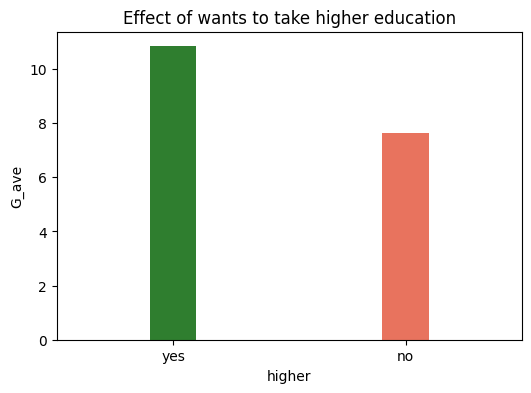

In [60]:
plt.figure(figsize=(6, 4))
sns.barplot(data=df, x='higher', y='G_ave', hue='higher',palette={'yes': 'forestgreen', 'no': 'tomato'},errorbar=None,width=0.2, dodge=False, legend=False)
plt.title('Effect of wants to take higher education')
plt.show()

-------------------------------------------------------------------------------------------------------------------------------
### 7 - Students have school support

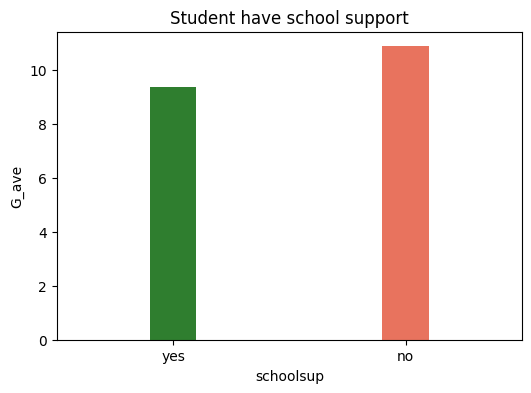

In [46]:
# Plot the effect of free time spent with friends on performenc
plt.figure(figsize=(6, 4))
sns.barplot(data=df, x='schoolsup', y='G_ave', hue='schoolsup',palette={'yes': 'forestgreen', 'no': 'tomato'},errorbar=None, width=0.2, dodge=False, legend=False)
plt.title('Student have school support')
plt.show()

Students that have school support seem need more or continus support.

---------------------------------------------------
**8. Influence of Romantic Relationships on Student performence**

romantic: with a romantic relationship (binary: yes or no)

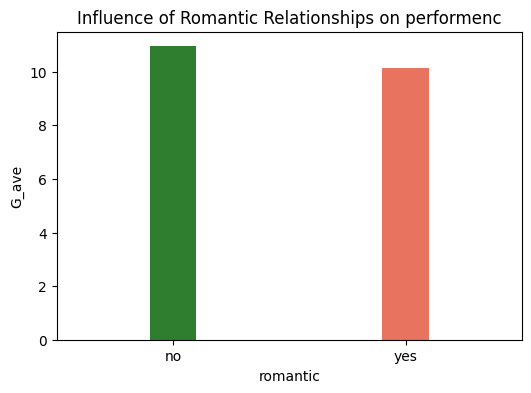

In [29]:
# Plot the influence of romantic relationships on performenc
plt.figure(figsize=(6, 4))
sns.barplot(data=df, x='romantic', hue='romantic', y='G_ave',  palette={'no': 'forestgreen', 'yes': 'tomato'},errorbar=None, width=0.2, dodge=False, legend=False)
plt.title('Influence of Romantic Relationships on performenc')
plt.show()

( students that have no romantic relation have better performance )






**9. Correlation Between study time and performenc**

studytime: weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours))




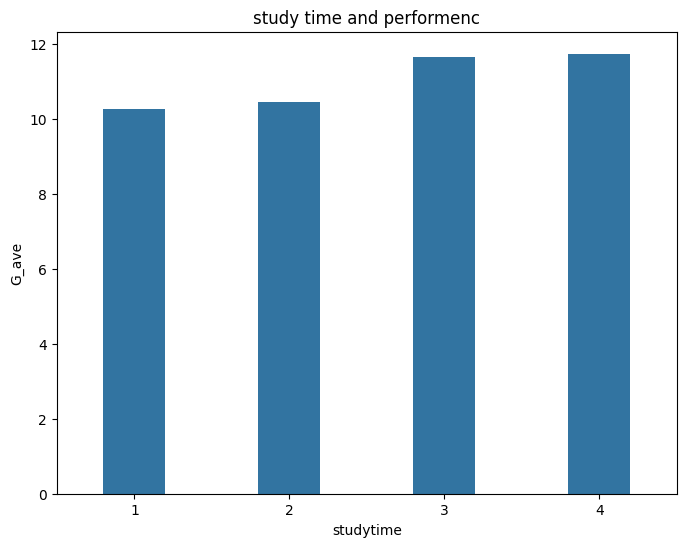

In [30]:
# Plot the correlation study time and performenc
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='studytime', y='G_ave',width=0.4,errorbar=None)
plt.title('study time and performenc')
plt.show()

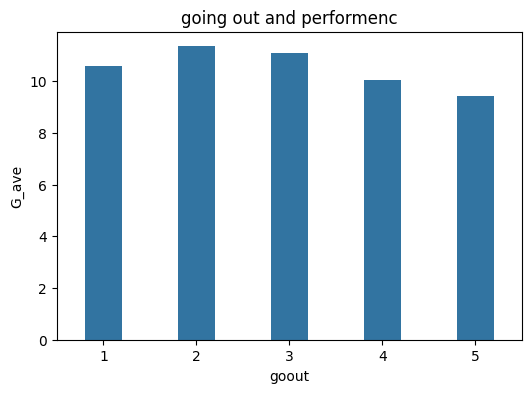

In [62]:
# Plot the correlation study time and performenc
plt.figure(figsize=(6, 4))
sns.barplot(data=df, x='goout', y='G_ave',width=0.4,errorbar=None)
plt.title('going out and performenc')
plt.show()

----------------------------------------------------------------------------------------------------------------------------------------
**11.** **Gender**

sex: student's sex (binary: 'F' - female or 'M' - male)

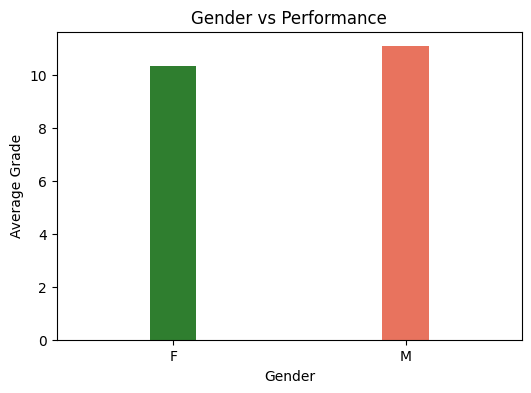

In [36]:
# Plot distribution by gender
plt.figure(figsize=(6, 4))
sns.barplot(data=df, x='sex', y='G_ave', hue='sex', palette={'F': 'forestgreen', 'M': 'tomato'},errorbar=None, width=0.2, dodge=False, legend=False)
plt.title('Gender vs Performance')
plt.xlabel('Gender')
plt.ylabel('Average Grade')
plt.show()

---------------------------------------------------------------------------------------------------------------------
 ### 12 -  Daly alcohol consumption and student performence
- Dalc: workday alcohol consumption (numeric: from 1 - very low to 5 - very high)

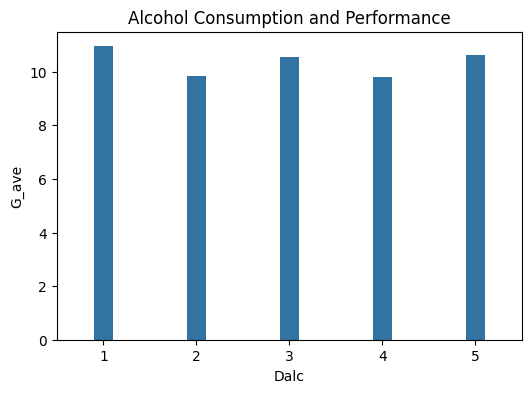

In [43]:
# Plot workday alcohol consumption and performence
plt.figure(figsize=(6, 4))
sns.barplot(data=df, x='Dalc', y='G_ave', errorbar=None, width=0.2)
plt.title('Alcohol Consumption and Performance')
plt.show()


## Extra analisis

- Correaltions between student performenc and all feautures

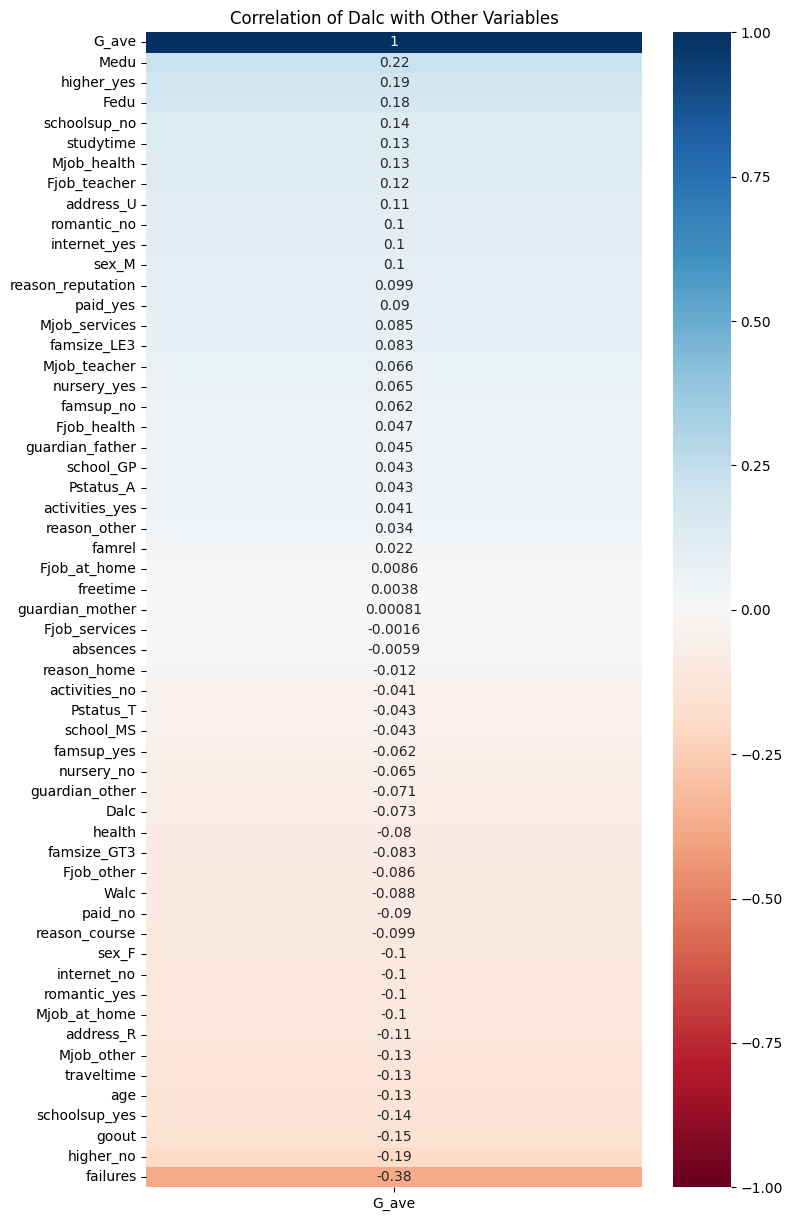

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

df_all = pd.read_csv("student-mat.csv")
df_all["G_ave"] = (df_all["G1"] + df_all["G2"] + df_all["G3"]) / 3
df_all = df_all.drop(["G1", "G2", "G3"], axis=1)

categorical_features = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian',
                        'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']

# One-Hot Encode categorical features
encoder = OneHotEncoder(sparse_output=False)
encoded_features = encoder.fit_transform(df_all[categorical_features])

# Create DataFrame with encoded features
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_features))

# Drop original categorical features and concatenate encoded features
df_all = df_all.drop(categorical_features, axis=1)
df_all = pd.concat([df_all, encoded_df], axis=1)

# Compute the correlation matrix
alc_correlations = df_all.corr()

# Sort the correlations with 'Dalc' in descending order
alc_correlations_sorted = alc_correlations['G_ave'].sort_values(ascending=False)

# Plot the heatmap
plt.figure(figsize=(8, 15))
sns.heatmap(alc_correlations_sorted.to_frame(), annot=True, cmap='RdBu', vmin=-1, vmax=1, cbar=True)
plt.title('Correlation of Dalc with Other Variables')
plt.show()

# Machin Learning Gaussian Naive Bayes classifier

In [17]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Create target variable based on the threshold
df_all['G_level'] = np.where(df['G_ave'] >=11, 'H', 'L')
X = df_all.drop(['G_ave', 'G_level'], axis=1)  # Features
y = df_all['G_level']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Model training
gnb.fit(X_train, y_train)

# Predict output
y_pred = gnb.predict(X_test)

# Print predictions and evaluate the model
print("Predicted labels:\n", y_pred,  "\n")
print("Accuracy:\n", accuracy_score(y_test, y_pred), "\n")
print("Classification report:\n", classification_report(y_test, y_pred))

Predicted labels:
 ['L' 'H' 'H' 'H' 'H' 'L' 'L' 'H' 'L' 'H' 'L' 'H' 'L' 'H' 'L' 'L' 'H' 'H'
 'L' 'L' 'L' 'H' 'H' 'H' 'H' 'L' 'L' 'L' 'H' 'H' 'L' 'H' 'L' 'L' 'L' 'H'
 'L' 'H' 'L' 'H' 'H' 'L' 'H' 'L' 'L' 'L' 'H' 'H' 'L' 'H' 'H' 'H' 'L' 'L'
 'H' 'L' 'L' 'L' 'L' 'H' 'H' 'H' 'H' 'L' 'H' 'L' 'L' 'L' 'L' 'H' 'L' 'L'
 'H' 'L' 'H' 'H' 'L' 'L' 'L'] 

Accuracy:
 0.6582278481012658 

Classification report:
               precision    recall  f1-score   support

           H       0.65      0.63      0.64        38
           L       0.67      0.68      0.67        41

    accuracy                           0.66        79
   macro avg       0.66      0.66      0.66        79
weighted avg       0.66      0.66      0.66        79

